<a href="https://colab.research.google.com/github/YusufAbdurrahmann/lung-cancer-classification/blob/main/lung_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# **Data Import**

In [3]:
df = pd.read_csv("sample_data/lung-cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# **Data Understanding**

In [4]:
print(df.shape)

(309, 16)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

# **Data Cleaning**

In [6]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [7]:
df.duplicated().sum()

33

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

# **Explanatory Data Analys (EDA)**

<ipython-input-16-0057aedf00b9>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="AGE", palette="pastel")


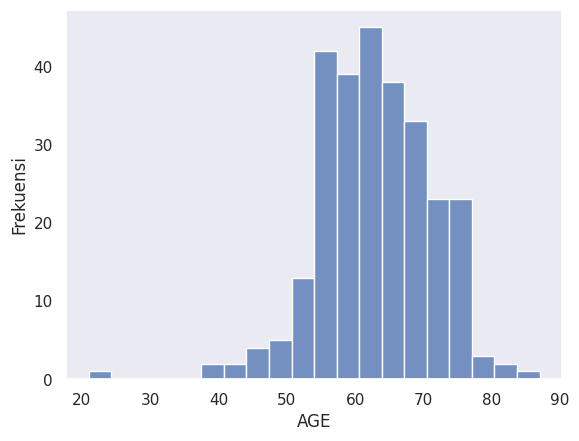

In [16]:
sns.set_theme(style="dark")
sns.histplot(data=df, x="AGE", palette="pastel")
plt.ylabel("Frekuensi")
plt.show()

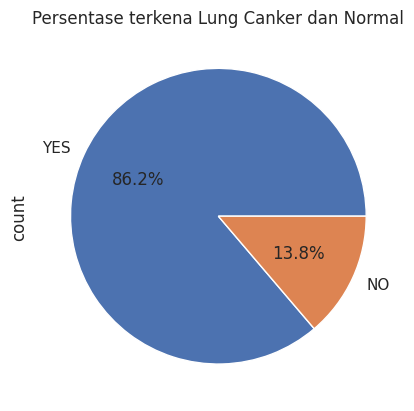

In [20]:
df["LUNG_CANCER"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Persentase terkena Lung Canker dan Normal")
plt.show()

# **Data Preprocessing**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [22]:
gd = LabelEncoder()
lc = LabelEncoder()

df["GENDER"] = gd.fit_transform(df["GENDER"])
df["LUNG_CANCER"] = lc.fit_transform(df["LUNG_CANCER"])

In [25]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [24]:
X = df.drop(columns = ["LUNG_CANCER"])
y = df["LUNG_CANCER"]

In [26]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Modelling**

In [31]:
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)

print(classification_report(y_pred,y_test))
print(accuracy)
print("Accuracy : {:.2f}%".format(accuracy*100))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.94      0.97        47

    accuracy                           0.95        56
   macro avg       0.88      0.97      0.91        56
weighted avg       0.96      0.95      0.95        56

0.9464285714285714
Accuracy : 94.64%
